***
***

<h1>  User Engagement Analysis - by Estelle Eteki </h1>


"Showwcase is an online platform where members of the tech community connect, share their knowledge, work experiences, projects built, people they've worked with - and find new opportunities. Showwcase users can like, follow, comment, and share posts on the platform."
<br>
<br>
The objective of this report is to present insights on the user engagement for the month of October in 2019.
    
***
***

<h2> Data Exploration </h2>

Import the packages for data science essientials, graphical output and regression modelling. <br>
* pandas 
* seaborn
* matplotlib.pyplot
<br>

And load the file 'showwcase_sessions_copy.csv' into Python, and display the first five rows.

In [1]:
# Import Libraries

import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns



In [2]:
#Read the csv file
df = pd.read_csv('showwcase_sessions_copy.csv')
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679


Display the dictionary to get a meaning of each column in the 'showwcase_sessions_copy.csv' dataset.

<strong> Data Dictionary </strong>

* session_id → unique identification number for each session <br>
* customer_id → unique identification number for each customer <br>
* login_date → the date the user logged into Showwcase for that session <br>
* projects_added → boolean if at least one project was added <br>
* likes_given → boolean if at least one like was given <br>
* comment_given → boolean if at least one comment was given <br>
* inactive_status → boolean if the user was inactive or idle <br>
* bugs_occurerd → boolean if a user ran into at least one bug <br>
* session_projects_added → number of projects added <br>
* session_likes_given → number of likes given <br>
* session_comments_given → number of comments given <br>
* inactive_duration → number of seconds a user was inactive or idle <br>
* bugs_in_session → number of bugs a user ran into <br>
* session_duration → number of seconds a user was logged for that session <br>

***

Display information about each variable, such as types and number of non-missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    int64  
 1   customer_id             300 non-null    int64  
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    bool   
 4   likes_given             300 non-null    bool   
 5   comment_given           300 non-null    bool   
 6   inactive_status         300 non-null    bool   
 7   bug_occured             300 non-null    bool   
 8   session_projects_added  300 non-null    int64  
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    int64  
 11  inactive_duration       300 non-null    int64  
 12  bugs_in_session         300 non-null    int64  
 13  session_duration        300 non-null    int64  
dtypes: bool(5), float64(1), int64(7), object(1

The column 'login_date' is as object. it should be changed to datetime. <br>
For one entry, the column 'session_likes_given' is null. We are going to drop this row from our dataset.

In [4]:
df.dropna()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,10/1/19,True,True,False,True,False,3,13.0,0,1174,0,2255
296,558332,87323,10/1/19,True,False,False,True,False,2,0.0,0,97,0,1692
297,643880,51243,10/1/19,True,False,False,True,False,2,0.0,0,906,0,1990
298,844518,23083,10/1/19,True,False,False,True,False,1,0.0,0,139,0,1113


*** 

Describe each quantitative columns with descriptive statistics (rounded to 2).

In [5]:
df.describe().round(2)

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.00,300.00,300.00,299.00,300.00,300.00,300.00,300.00
mean,530643.30,44956.77,1.62,10.46,2.41,732.93,1.23,1186.76
std,280421.37,26411.34,1.33,9.47,2.25,838.14,1.76,688.63
min,22885.00,10246.00,0.00,0.00,0.00,0.00,0.00,10.00
25%,308358.00,23571.25,1.00,0.00,0.75,0.00,0.00,611.25
50%,553675.00,38967.00,2.00,9.00,2.00,313.50,0.00,1152.00
75%,804120.25,73245.00,3.00,19.00,4.00,1524.75,2.25,1778.00
max,999480.00,98653.00,9.00,27.00,21.00,2480.00,5.00,2395.00


***
We are going to analyze the consistency of the data by making sure that for all the entries, there is no one where the inactive duration is greater than the session duration.

In [6]:
df_duration = df[df['inactive_duration'] < df['session_duration']]
df_duration

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,10/1/19,True,True,False,True,False,3,13.0,0,1174,0,2255
296,558332,87323,10/1/19,True,False,False,True,False,2,0.0,0,97,0,1692
297,643880,51243,10/1/19,True,False,False,True,False,2,0.0,0,906,0,1990
298,844518,23083,10/1/19,True,False,False,True,False,1,0.0,0,139,0,1113


For 88 rows in the dataset, the inactive duration is greater than the session duration. <br>
Those rows are going to be removed from the dataset we will use to perform our analysis.

*** 
Now we are going to make sure that for our new dataset, there is no user with an inactive duration greater non null and the inactive status sets to 'False'.

In [7]:
(df_duration[df['inactive_status'] == False]['inactive_duration'] > 0).value_counts()

/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


False    128
Name: inactive_duration, dtype: int64

There is no such entry. Our dataset is now correct.

<h2> Analysis </h2>

<h3> Session Duration </h3>

The session duration might be an important factor to analyze engagement, but it is important too to understand what factors have an impact on this event, to avoid misleading conclusions. <br><br>

The following graphs will present the average session duration grouped by the following events:
* Projects added
* Likes given
* Comments given
* Inactive Status


<function matplotlib.pyplot.show(*args, **kw)>

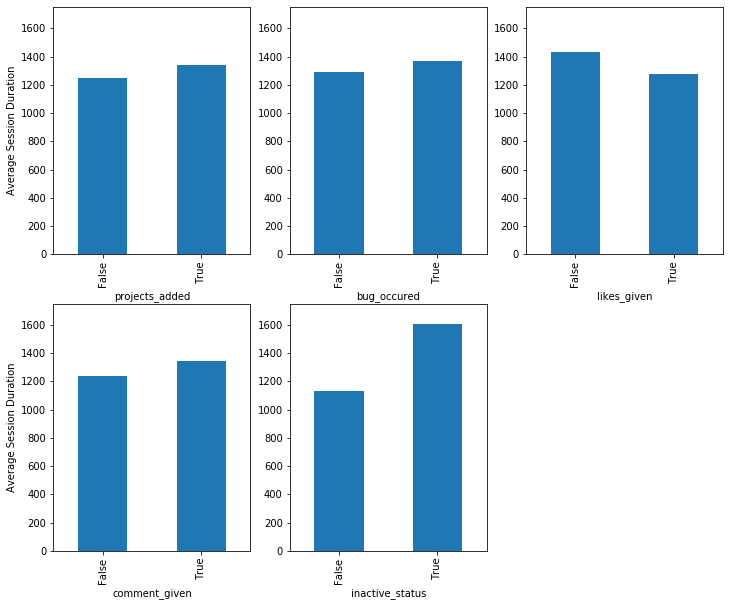

In [8]:
plt.subplots(figsize = (12, 10))

# By Projects added 
plt.subplot(2,3,1)
df_duration.groupby('projects_added')['session_duration'].mean().plot(kind = 'bar', ylim = [0, 1750])
plt.ylabel('Average Session Duration')

# By Bug Occured
plt.subplot(2,3,2)
df_duration.groupby('bug_occured')['session_duration'].mean().plot(kind = 'bar', ylim = [0, 1750])

# By Like given
plt.subplot(2,3,3)
df_duration.groupby('likes_given')['session_duration'].mean().plot(kind = 'bar', ylim = [0, 1750])

# By Comment given
plt.subplot(2,3,4)
df_duration.groupby('comment_given')['session_duration'].mean().plot(kind = 'bar', ylim = [0, 1750])
plt.ylabel('Average Session Duration')

# By Inactive status
plt.subplot(2,3,5)
df_duration.groupby('inactive_status')['session_duration'].mean().plot(kind = 'bar', ylim = [0, 1750])

plt.show


***

As far as we consider the session duration as an important metric, we should also acknowledge that, on average if a user has been inactive during its session, the user would spend more time during that session. We should the perform a deeper analysis to understand what lead users to be inactive on the platform.

<h3> Outlier Analysis </h3>

The following graphsare plotting the distribution of each column and the images file are saved in the working directory

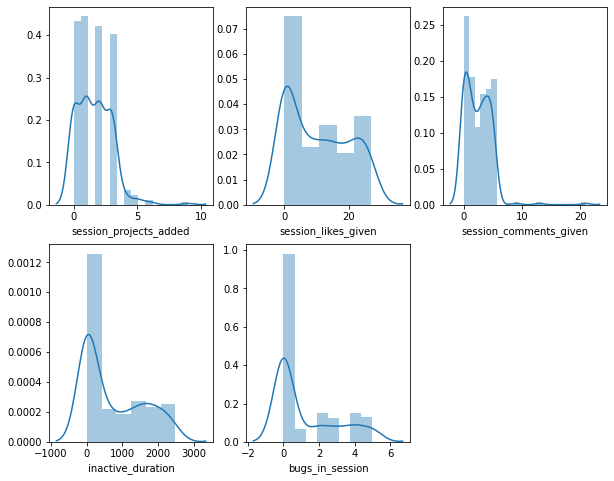

In [9]:
plt.subplots(figsize = (10, 8))
plt.subplot(2, 3, 1)
sns.distplot(df['session_projects_added'],
             bins  = 'fd')

plt.subplot(2, 3, 2)
sns.distplot(df['session_likes_given'],
             bins  = 'fd')

plt.subplot(2, 3, 3)
sns.distplot(df['session_comments_given'],
             bins  = 'fd')

plt.subplot(2, 3, 4)
sns.distplot(df['inactive_duration'],
             bins  = 'fd')

plt.subplot(2, 3, 5)
sns.distplot(df['bugs_in_session'],
             bins  = 'fd')

From the graphs, we get that there are many users facing bugs. This should be a critical issue to fix for the company to enhance engagement.<br><br>
From the users that are giving comments, most of them are giving 1-6 per session. And for the ones giving likes, most of them are between 0 and 25. <br><br>
Even though, many users are not inactive, the inactive duration for inactive users varies between 0 and 2500 seconds (42 minutes). <br><br>
Users add between 0 to 5 projects per session 

<h3> Daily Usage </h3>

***

We will now the count of users per day to understand how users behave daily on the daily frequency usage on the platform

In [10]:
# Split the login date by month, date and year
d1 = pd.DataFrame(df_duration['login_date'].str.split(pat = '/',expand = True))

# Merge the two datasets
df_duration = pd.merge(df_duration, d1, how='left', left_index=True, right_index=True)

# Rename the columns
df_duration.rename(columns = {0:'login_month',
                              1:'login_day',
                              2:'login_year'}, inplace = True)
# df_duration

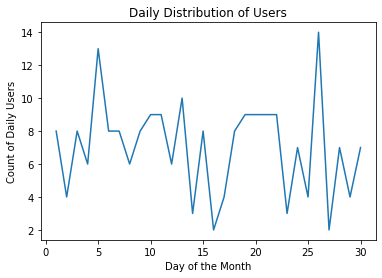

In [11]:
# Change the 'login_day' type to numeric
df_duration['login_day'] = pd.to_numeric(df_duration['login_day'])

# Plot the distribution among the month
df_duration['login_day'].value_counts().sort_index().plot(kind = 'line');
plt.title('Daily Distribution of Users')
plt.xlabel('Day of the Month');
plt.ylabel('Count of Daily Users');

***
The daily counts of users logging onto the platform fluctuates. Even though the period we analyze the data is short, it can demonstrate that users are not yet loyal to the platform. Also, the company might want to understand the events that occurred the 5th and the 26th to generate an high count.

In [12]:
#Average Visit per user
df_duration['customer_id'].value_counts().mean()

4.930232558139535

Moreover, the average number of sessions per user for this period is 5. It means that over a 30-day period, a user will login 5 times on average

<H3> Inactive Duration </H3>

From our dataset, we stated previously that the inactive status should be examined deeper. We will now understand the user behavior toward inactivity. The following graphs will present the average inactive duration time grouped by the following events:
* Bugs occured
* Projects added
* Comments given
* Likes given

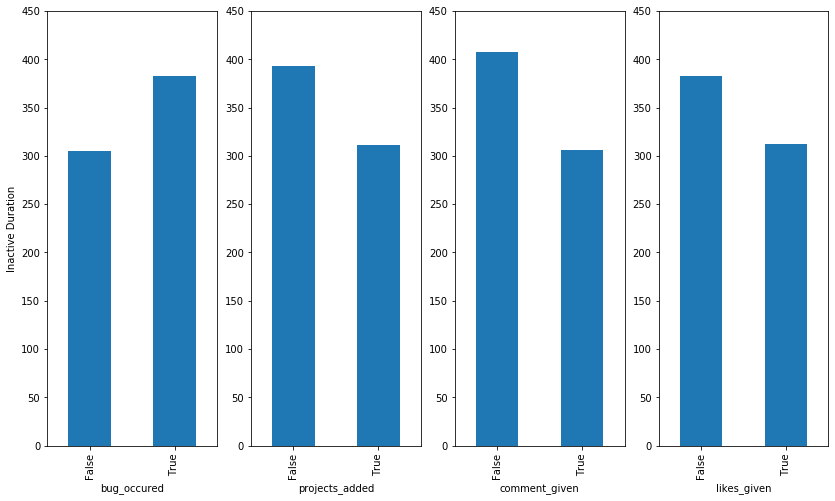

In [13]:
plt.subplots(figsize = (14, 8))

#Inactive Duration and Bug Occured
plt.subplot(1, 4, 1)
df_duration.groupby('bug_occured')['inactive_duration'].mean().plot(kind = 'bar', ylim = [0, 450])
plt.ylabel('Inactive Duration')

#Inactive Duration and Projects Added
plt.subplot(1, 4, 2)
df_duration.groupby('projects_added')['inactive_duration'].mean().plot(kind = 'bar', ylim = [0, 450])

#Inactive Duration and Comment Given
plt.subplot(1, 4, 3)
df_duration.groupby('comment_given')['inactive_duration'].mean().plot(kind = 'bar', ylim = [0, 450])

#Inactive Duration and Like Given
plt.subplot(1, 4, 4)
df_duration.groupby('likes_given')['inactive_duration'].mean().plot(kind = 'bar', ylim = [0, 450])


plt.show()

*** 
Those graphes presents us that if users are interacting (like adding projects, give comments) in the platform, their inactive duration will likely decrease. However, as stated previously, the company should gather consumer behaviour data to understand what lead to inactive status. <br>
On the other hand, users experiencing bugs will have an higher inactive duration that users not experiencing bugs. So, the company should also focus on fixing bugs.

<h2> Conclusion </h2>

The objective of this report was to perform an analysis of the user engagement within Showwcase platform. 
<br>
From the outlier analysis, we get the range from which most users are for each event, and remove outliers from our future analysis. For instance, most of the users add up to 5 projects per session.
<br>
From the daily usage graph, we saw that the numbers of daily sessions fluctuates a lot. It might demonstrates that customers not finding his way back to the platform. 
<br>
The session duration might not be a good metric for engagement because of the inactive status. On average, an user will spend more time on the platform if the user was inactive.
<br>
on average the inactive duration increase if the user is facing bugs. And that duration is less for people performing events rather than the ones that are not performing.
<br><br>

From our findings, we can say that an engaged user is the one who at least performing one of the events: adding a project, commenting or liking a project. The bugs are a major issue for the activity in the platform and the company should focus on fixing them.<br>
Moreover, the company should think an in-depth analysis on the user behavior on the website, to understand why are they inactive. Some metrics such as pages visited, and metrics about the "share event". <br>
The company can also add video or articles on how to use the platform. New users might not always understand how the website works. From my own use, the page leading to "Guidelines" was not working. 